In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import networkx as nx

import syft as sy
from syft.service.action.action_graph_service import ActionGraphService, NodeActionDataUpdate, ExecutionStatus
from syft.service.action.action_graph_service import NodeActionData, NodeType
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.action.action_graph import NetworkXBackingStore
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey, SyftVerifyKey
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject
from syft.service.action.action_graph_service import ExecutionStatusPartitionKey
from syft.store.document_store import QueryKeys
from syft.service.response import SyftError
print(sy.__version__)

signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
in_mem_graph_config = InMemoryGraphConfig()
authed_context = AuthedServiceContext(credentials=verify_key)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.1-beta.1


## `add_action_obj`

In [2]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config)
in_mem_action_graph_service = ActionGraphService(store=in_mem_graph_store)

In [3]:
action_obj = ActionObject.from_obj([1, 2, 3])
in_mem_action_graph_service.add_action_obj(
    context=authed_context, action_obj=action_obj
)

```python
class NodeActionData:
  id: str = aa104f32e4374459a3d4ef76e5959ec9
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:38:14
  updated_at: str = None
  user_verify_key: str = a3027a8164f285de76722fd32fab1077babcb4fd0de7e444c086118f84ea3ee2
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [4]:
error = in_mem_action_graph_service.add_action_obj(
    context=authed_context, action_obj=action_obj
)

In [5]:
action_obj.id

<UID: aa104f32e4374459a3d4ef76e5959ec9>

In [6]:
'Node already exists in the graph' in error.message

True

## `add_action` (no mutagen)

action_obj_a = [1, 2 ,3]  
action_obj_b = [2, 3, 4]  
action = add(a, b)  

In [7]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config)
in_mem_action_graph_service = ActionGraphService(store=in_mem_graph_store)
G = in_mem_action_graph_service.store.graph.db
labels_dict = {}

In [8]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action_obj_b = ActionObject.from_obj([2, 3, 4])
in_mem_action_graph_service.add_action_obj(
    context=authed_context, action_obj=action_obj_a
)
in_mem_action_graph_service.add_action_obj(
    context=authed_context, action_obj=action_obj_b
)
labels_dict[action_obj_a.id] = "A"
labels_dict[action_obj_b.id] = "B"

In [9]:
action = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
labels_dict[action.id] = "+"
labels_dict[action.result_id.id] = "C"
action_node, result_node = in_mem_action_graph_service.add_action(
    context=authed_context, action=action
)

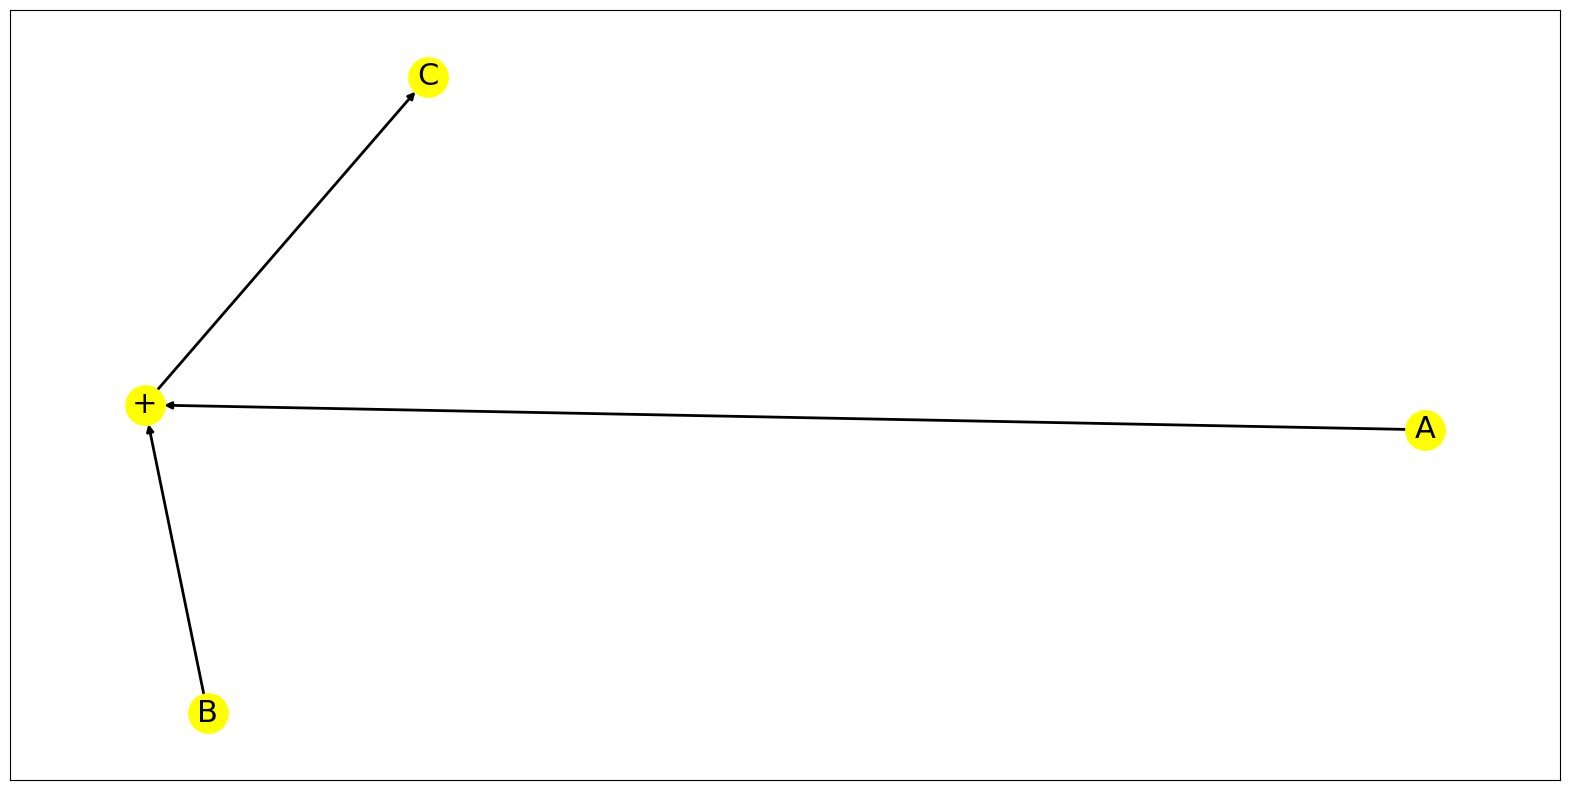

In [10]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx(G, pos=pos, labels=labels_dict, with_labels=True, width=2.0, node_color="yellow", node_size=800, font_size=22)

In [ ]:
in_mem_action_graph_service.store.graph.visualize()

In [ ]:
in_mem_action_graph_service.get_all_nodes(authed_context)

## `add_action` (mutagen)

In [2]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config)
in_mem_action_graph_service = ActionGraphService(store=in_mem_graph_store)
G = in_mem_action_graph_service.store.graph.db
labels_dict = {}

action_obj_d = ActionObject.from_obj([1, 2, 3])
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                           action_obj=action_obj_d)
labels_dict[action_obj_d.id] = "[1, 2 ,3]"

action = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action_node, result_node = in_mem_action_graph_service.add_action(
    context=authed_context, action=action
)
labels_dict[action.id] = "np.array"
labels_dict[action.result_id.id] = "d"

In [3]:
result_node

```python
class NodeActionData:
  id: str = 233d74ce79f94453b139ad9237b2600b
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:05
  updated_at: str = None
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [4]:
as_type_action_obj = ActionObject.from_obj('np.int32')
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                           action_obj=as_type_action_obj)
labels_dict[as_type_action_obj.id] = "np.int32"

action2 = Action(
    path="action.execute",
    op="astype",
    remote_self=action.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action.result_id
)
action_node_2, result_node_2 = in_mem_action_graph_service.add_action(
    context=authed_context, action=action2
)
labels_dict[action2.id] = "astype"

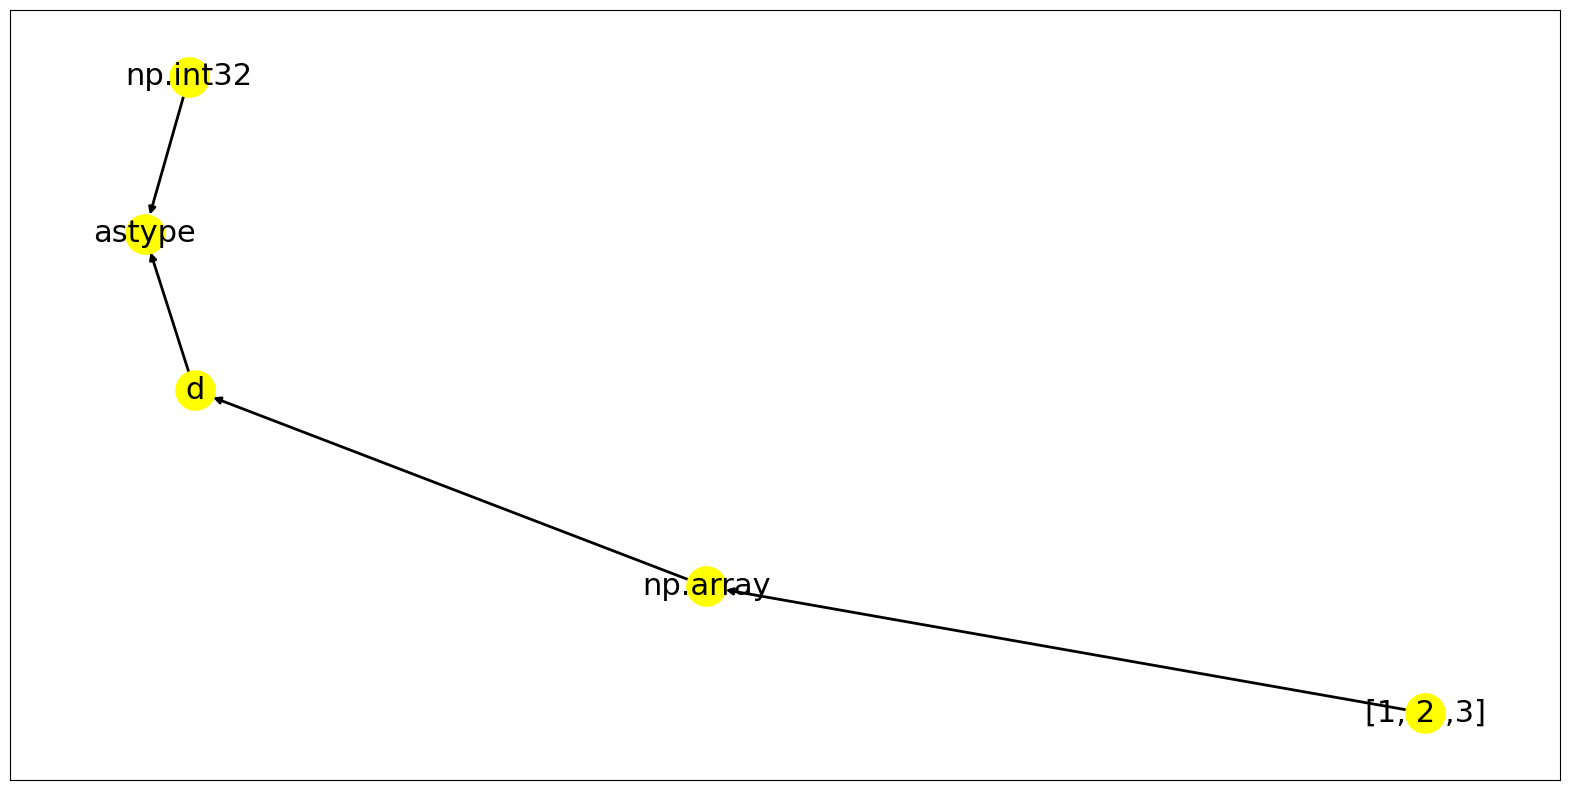

In [5]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)p
nx.draw_networkx(G, pos=pos, labels=labels_dict, with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

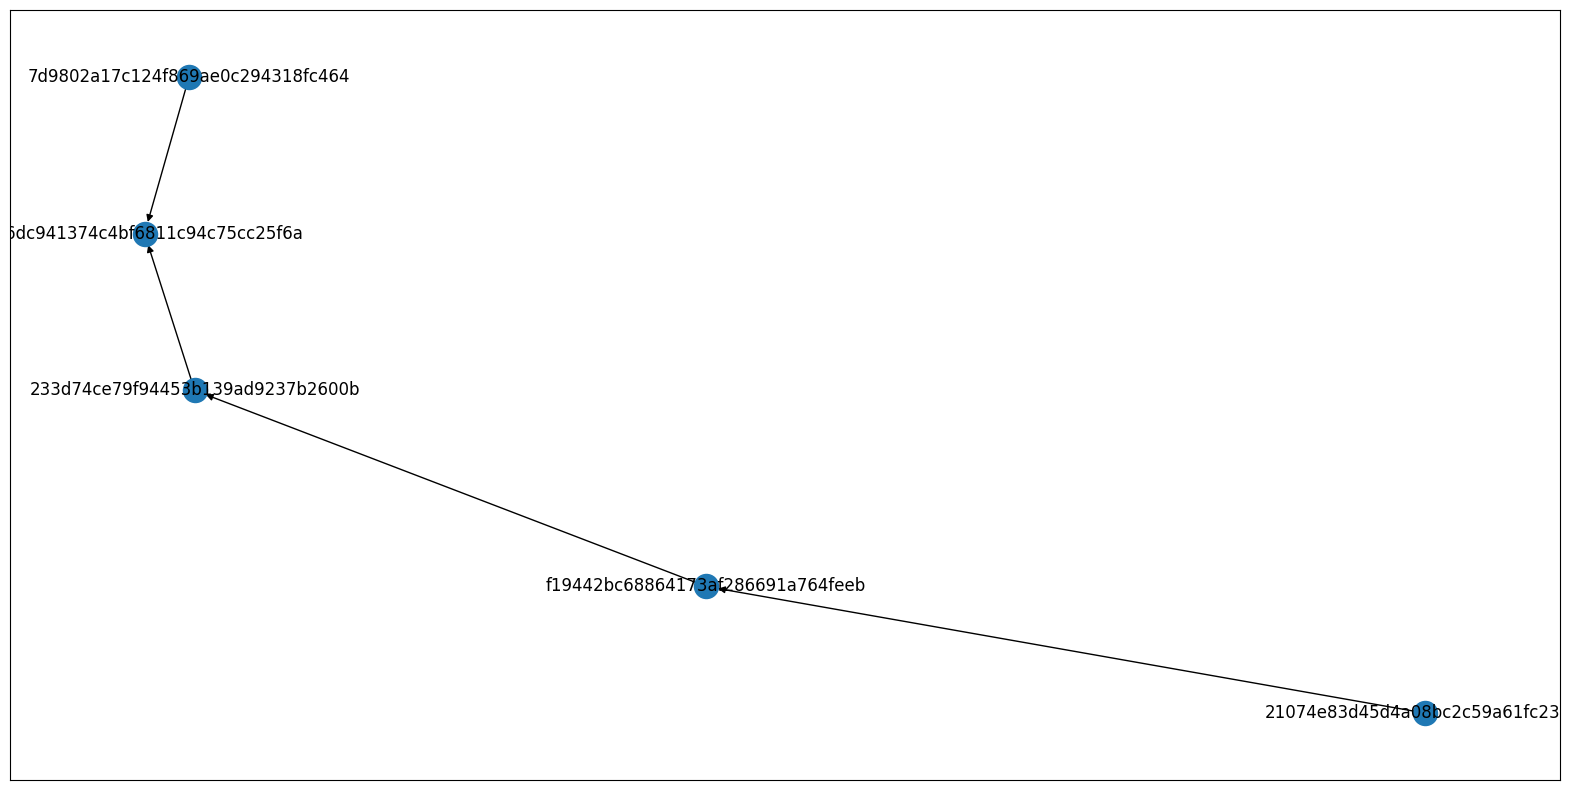

In [6]:
in_mem_action_graph_service.store.graph.visualize()

In [7]:
len(in_mem_action_graph_service.get_all_nodes(authed_context))

5

In [8]:
len(in_mem_action_graph_service.get_all_edges(authed_context))

4

In [10]:
print(labels_dict[action_node_2.id])
action_node_2

astype


```python
class NodeActionData:
  id: str = 366dc941374c4bf6811c94c75cc25f6a
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:12
  updated_at: str = None
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = False
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [11]:
print(labels_dict[result_node_2.id])
result_node_2

d


```python
class NodeActionData:
  id: str = 233d74ce79f94453b139ad9237b2600b
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:05
  updated_at: str = 2023-05-11 02:45:12
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 366dc941374c4bf6811c94c75cc25f6a
  last_nm_mutagen_node: str = 366dc941374c4bf6811c94c75cc25f6a

```

In [12]:
print(labels_dict[result_node.id])
result_node

d


```python
class NodeActionData:
  id: str = 233d74ce79f94453b139ad9237b2600b
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:05
  updated_at: str = 2023-05-11 02:45:12
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 366dc941374c4bf6811c94c75cc25f6a
  last_nm_mutagen_node: str = 366dc941374c4bf6811c94c75cc25f6a

```

In [ ]:
pprint(labels_dict)

In [ ]:
in_mem_action_graph_service.get_all_nodes(authed_context)

### Add another mutation

In [13]:
idx_action_obj = ActionObject.from_obj(2)
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=idx_action_obj)
labels_dict[idx_action_obj.id] = "idx=2"

item_val_action_obj = ActionObject.from_obj(5)
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=item_val_action_obj)
labels_dict[item_val_action_obj.id] = "val=5"

action3 = Action(
    path="action.execute",
    op="__setitem__",
    remote_self=action.result_id,
    args=[idx_action_obj.syft_lineage_id, item_val_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action.result_id
)
action_node_3, result_node_3 = in_mem_action_graph_service.add_action(context=authed_context, 
                                       action=action3)
labels_dict[action3.id] = "__setitem__"

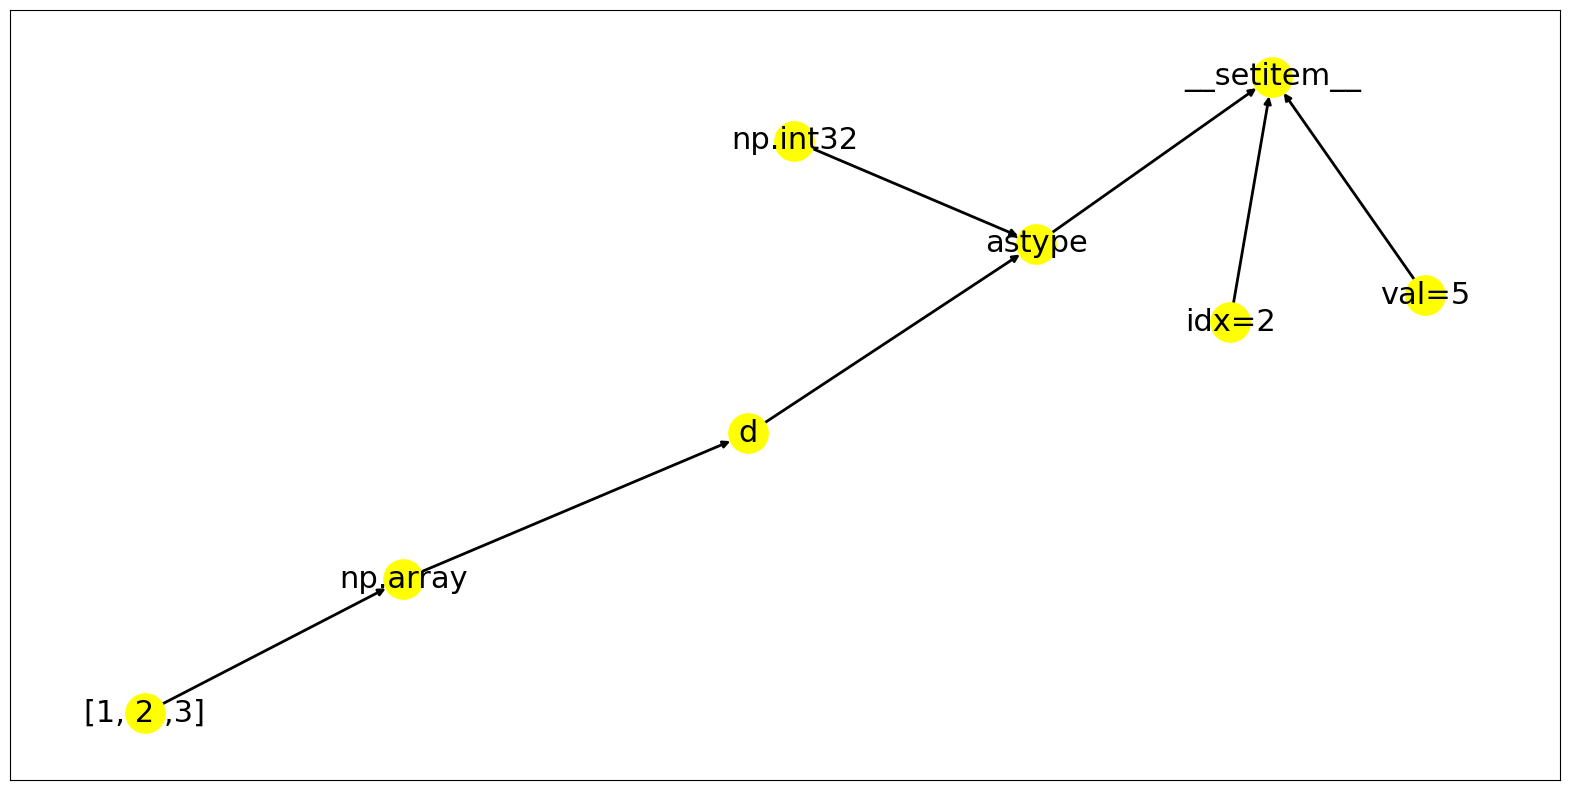

In [14]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)p
nx.draw_networkx(G, pos=pos, labels=labels_dict, with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

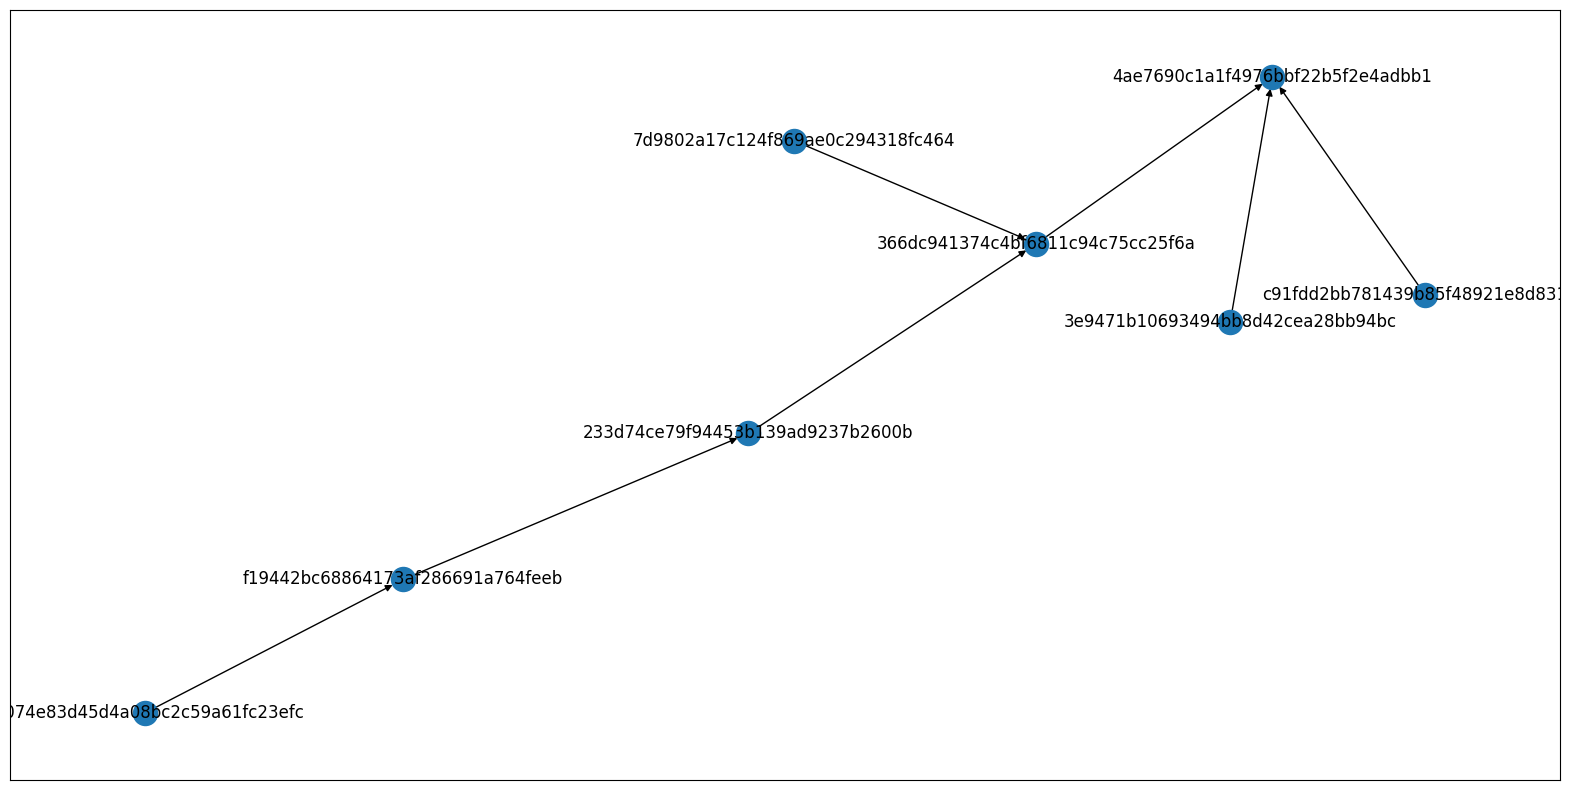

In [15]:
in_mem_action_graph_service.store.graph.visualize()

In [16]:
in_mem_action_graph_service.get_all_nodes(authed_context)

NodeDataView({<UID: 21074e83d45d4a08bc2c59a61fc23efc>: {'data': class NodeActionData:
  id: str = 21074e83d45d4a08bc2c59a61fc23efc
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:05
  updated_at: str = None
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: f19442bc68864173af286691a764feeb>: {'data': class NodeActionData:
  id: str = f19442bc68864173af286691a764feeb
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:05
  updated_at: str = None
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: 233d7

In [17]:
pprint(labels_dict)

{<UID: 21074e83d45d4a08bc2c59a61fc23efc>: '[1, 2 ,3]',
 <UID: 233d74ce79f94453b139ad9237b2600b>: 'd',
 <UID: 366dc941374c4bf6811c94c75cc25f6a>: 'astype',
 <UID: 3e9471b10693494bb8d42cea28bb94bc>: 'idx=2',
 <UID: 4ae7690c1a1f4976bbf22b5f2e4adbb1>: '__setitem__',
 <UID: 7d9802a17c124f869ae0c294318fc464>: 'np.int32',
 <UID: c91fdd2bb781439b85f48921e8d83164>: 'val=5',
 <UID: f19442bc68864173af286691a764feeb>: 'np.array'}


In [42]:
action_node_3

```python
class NodeActionData:
  id: str = 4ae7690c1a1f4976bbf22b5f2e4adbb1
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:46:31
  updated_at: str = None
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = False
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [43]:
action_node_2

```python
class NodeActionData:
  id: str = 366dc941374c4bf6811c94c75cc25f6a
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:12
  updated_at: str = 2023-05-11 02:46:31
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = 4ae7690c1a1f4976bbf22b5f2e4adbb1
  last_nm_mutagen_node: str = 4ae7690c1a1f4976bbf22b5f2e4adbb1

```

In [44]:
print(labels_dict[result_node.id])
result_node

d


```python
class NodeActionData:
  id: str = 233d74ce79f94453b139ad9237b2600b
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:05
  updated_at: str = 2023-05-11 02:46:31
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 366dc941374c4bf6811c94c75cc25f6a
  last_nm_mutagen_node: str = 4ae7690c1a1f4976bbf22b5f2e4adbb1

```

In [19]:
print(labels_dict[result_node_2.id])
result_node_2

d


```python
class NodeActionData:
  id: str = 233d74ce79f94453b139ad9237b2600b
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:05
  updated_at: str = 2023-05-11 02:46:31
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 366dc941374c4bf6811c94c75cc25f6a
  last_nm_mutagen_node: str = 4ae7690c1a1f4976bbf22b5f2e4adbb1

```

In [20]:
print(labels_dict[result_node_3.id])
result_node_3

astype


```python
class NodeActionData:
  id: str = 366dc941374c4bf6811c94c75cc25f6a
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:12
  updated_at: str = 2023-05-11 02:46:31
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = 4ae7690c1a1f4976bbf22b5f2e4adbb1
  last_nm_mutagen_node: str = 4ae7690c1a1f4976bbf22b5f2e4adbb1

```

In [24]:
action.result_id == action2.result_id == action3.result_id

True

In [23]:
print(labels_dict[action_node_2.id])
action_node_2

astype


```python
class NodeActionData:
  id: str = 366dc941374c4bf6811c94c75cc25f6a
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 02:45:12
  updated_at: str = 2023-05-11 02:46:31
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = 4ae7690c1a1f4976bbf22b5f2e4adbb1
  last_nm_mutagen_node: str = 4ae7690c1a1f4976bbf22b5f2e4adbb1

```

### Operation on the mutated result: `f = d + 48`

In [25]:
arg_action_obj = ActionObject.from_obj(48)
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=arg_action_obj)

```python
class NodeActionData:
  id: str = 507352a270ff46cc8079097708840159
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-11 03:30:50
  updated_at: str = None
  user_verify_key: str = cb808601f748edfe6d4f5f97cff94beed5b130a33bf65bf8d1daa2b92cbed466
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [41]:
print(result_node_3 == action_node_2)
print(labels_dict[result_node_3.id])

True
astype


In [26]:
labels_dict[arg_action_obj.id] = "48"

In [27]:
action4 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action.result_id,
    args=[arg_action_obj.syft_lineage_id],
    kwargs={},
)
in_mem_action_graph_service.add_action(context=authed_context, 
                                       action=action4)
labels_dict[action4.id] = "+"
labels_dict[action4.result_id.id] = "F"

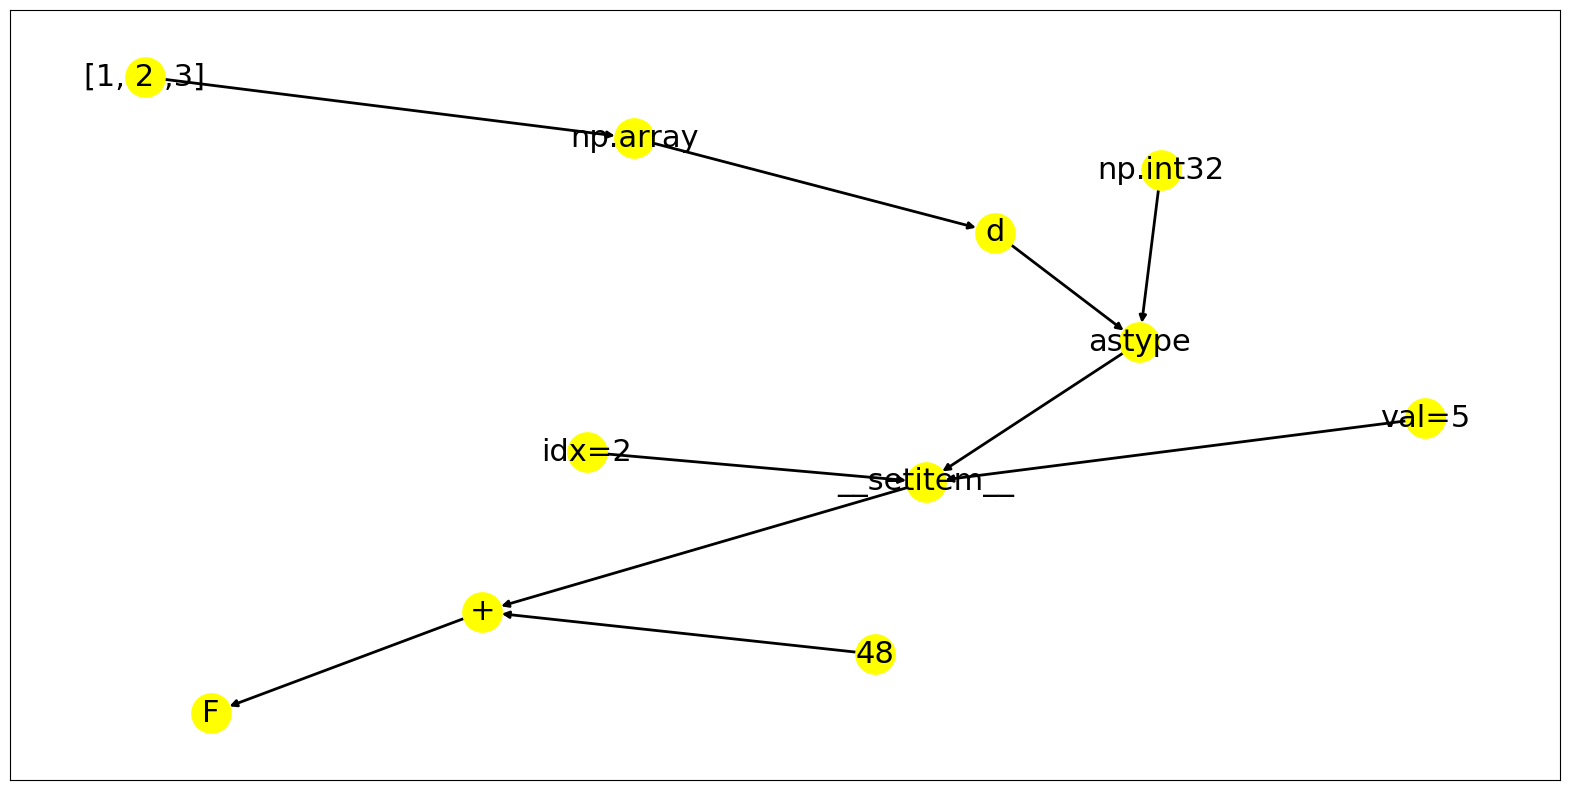

In [28]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)p
nx.draw_networkx(G, pos=pos, labels=labels_dict, with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

When we add the `action4` using the action graph service, first we find that an input is the node `d` (the `remote_self=action.result_id`). Then when calling `store.set`, it calls the `add_edge` function which calls `_get_last_non_mutated_mutagen` to find out that `__set_item__` is the last non_mutated_mutagen node of `d`

In [30]:
in_mem_action_graph_service._extract_input_and_output_from_action(action4)

({<UID: 233d74ce79f94453b139ad9237b2600b>,
  <UID: 507352a270ff46cc8079097708840159>},
 <UID: b6e15002e13343c58a41353519f1d104>)

In [32]:
pprint(labels_dict)

{<UID: 21074e83d45d4a08bc2c59a61fc23efc>: '[1, 2 ,3]',
 <UID: 233d74ce79f94453b139ad9237b2600b>: 'd',
 <UID: 366dc941374c4bf6811c94c75cc25f6a>: 'astype',
 <UID: 3e9471b10693494bb8d42cea28bb94bc>: 'idx=2',
 <UID: 4ae7690c1a1f4976bbf22b5f2e4adbb1>: '__setitem__',
 <UID: 507352a270ff46cc8079097708840159>: '48',
 <UID: 7d9802a17c124f869ae0c294318fc464>: 'np.int32',
 <UID: 8665e4ff512a4c70be1c0ad391c17d66>: '+',
 <UID: b6e15002e13343c58a41353519f1d104>: 'F',
 <UID: c91fdd2bb781439b85f48921e8d83164>: 'val=5',
 <UID: f19442bc68864173af286691a764feeb>: 'np.array'}


In [48]:
in_mem_action_graph_service.store.is_parent(parent=action3.id, child=action4.id)

Ok(True)